<a href="https://colab.research.google.com/github/Montse1708/ProyectoFinal_Dashboard/blob/main/TI_1_ProyectoFinal_JessicaMorales_CarlaSanchez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Proyecto Final**

##Integrantes:
* **Nombre:** Jessica Montserrat Morales Enrique  
* **e-mail:** jessica.morales5556@alumnos.udg.mx

- **Nombre:** Carla Georgina Sánchez Arreguín
- **email:** carla.sanchez2472@alumnos.udg.mx

#MODULES

##Install modules

In [2]:
pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 3.8 MB/s eta 0:00:00


In [3]:
pip install panel

In [4]:
import numpy as np
import pandas as pd
import math
import geopandas as gpd
import folium
import panel as pn
import panel.widgets as pnw
from unidecode import unidecode
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

import plotly.express as px

#DATASET

##Dataset de COVID en México

###Dataset almacenado en link

In [70]:
#Cargar los datos del archivo CSV
#En el siguiente link se encuentra los datos almacenados
url = 'https://raw.githubusercontent.com/marianarf/covid19_mexico_analysis/master/mexico_covid19.csv'
df = pd.read_csv(url)

###Dataset descargado de Kaggle


In [6]:
#Cargar el dataset con los datos
#Link del repositorio en Kaggle: https://www.kaggle.com/datasets/marianarfranklin/mexico-covid19-clinical-data?resource=download
df = pd.read_csv('/content/mexico_covid19.csv')

##GeoJSON de los límites de los estados de México

In [71]:
# Descargar el archivo GeoJSON de los límites de México
geojson_url = 'https://raw.githubusercontent.com/angelnmara/geojson/master/mexicoHigh.json'
mexico_map = gpd.read_file(geojson_url)

#MOSTRAR MAPA

In [72]:
# Quitar acentos
mexico_map['name'] = mexico_map['name'].apply(unidecode)

# Calcular el total de casos por estado
total_casos_por_estado = df.groupby('ENTIDAD').size().reset_index(name='total_casos')

# Unir los datos de casos con el archivo GeoJSON
mexico_map = mexico_map.merge(total_casos_por_estado, left_on='name', right_on='ENTIDAD', how='left')

# Crear un mapa de folium
m = folium.Map(location=[24, -102], zoom_start=5, tiles='cartodbpositron')

# Añadir el mapa de coropletas (choropleth map)
folium.Choropleth(
    geo_data=mexico_map,
    name='Total de Casos de COVID-19 por Estado',
    data=mexico_map,
    columns=['name', 'total_casos'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Total de Casos de COVID-19 por Estado'
).add_to(m)

# Cargar la extensión de Panel
pn.extension()

# Crear un panel con el mapa y el menú desplegable
map_panel = pn.pane.HTML(m._repr_html_(), sizing_mode='stretch_width', height=800)
pn.Row(map_panel)

Row
    [0] HTML(str, height=800, sizing_mode='stretch_width')

# Matriz de Correlación

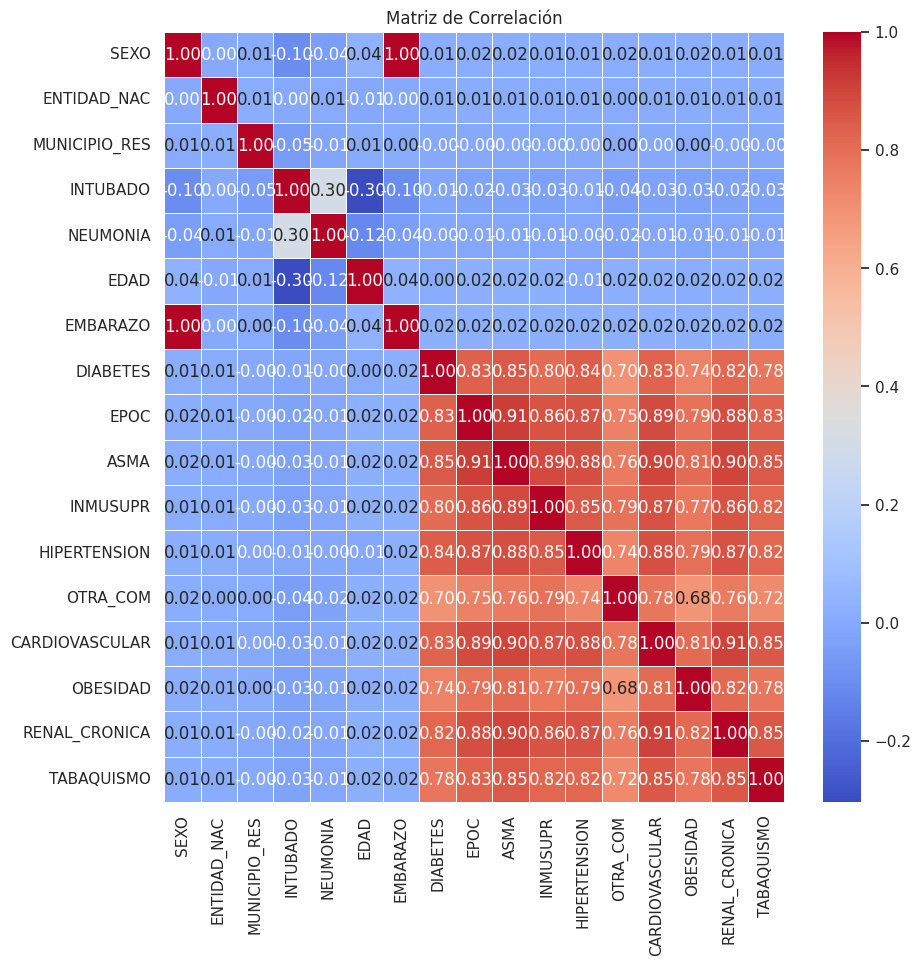

<Figure size 640x480 with 0 Axes>

In [101]:
columnas_seleccionadas = ["ENTIDAD", "SEXO", "ENTIDAD_NAC", "MUNICIPIO_RES", "INTUBADO", "NEUMONIA", "EDAD", "EMBARAZO", "DIABETES",
                           "EPOC", "ASMA", "INMUSUPR", "HIPERTENSION", "OTRA_COM", "CARDIOVASCULAR", "OBESIDAD",
                           "RENAL_CRONICA", "TABAQUISMO"]

# Filtrar el DataFrame para incluir solo las columnas seleccionadas
df_filtrado = df[columnas_seleccionadas]

# Calcular la matriz de correlación
matriz_correlacion = df_filtrado.corr(numeric_only=True)


# Configurar el estilo de seaborn para mejorar la visualización
sns.set(style="white")

# Crear un mapa de calor con la matriz de correlación
# Crear un gráfico de seaborn en una figura de matplotlib
plt.figure(figsize=(10, 10))
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlación")
plt.show()  # Cerrar la figura para que no se muestre automáticamente

# Convertir la figura en un objeto Panel
matriz_panel = pn.pane.Matplotlib(plt.gcf(), tight=True)

#Mostrar dashboard

In [96]:
#Widgets
selectEstado = pnw.Select(name="Estado:", width=220, value='Todos', options=['Todos','Jalisco'])
selectSexo = pnw.IntInput(name='Sexo:', width=100, value=0, step=1, start=1, end=100)
selectEdad = pnw.Select(name='Edad:', width=100, value='Todos', options=['Todos','Femenino', 'Masculino'])

In [98]:
pn.Row(pn.Column(selectEstado, pn.Row(selectSexo, selectEdad)), map_panel)

Row
    [0] Column
        [0] Select(name='Estado:', options=['Todos', 'Jalisco'], value='Todos', width=220)
        [1] Row
            [0] IntInput(end=100, name='Sexo:', start=1, width=100)
            [1] Select(name='Edad:', options=['Todos', 'Femenino', ...], value='Todos', width=100)
    [1] HTML(str, height=800, sizing_mode='stretch_width')

Row
    [0] Column
        [0] MultiSelect(name='Columnas:', options=['ENTIDAD', 'SEXO', ...], value=['ENTIDAD'])
    [1] Row
        [0] Matplotlib(None)

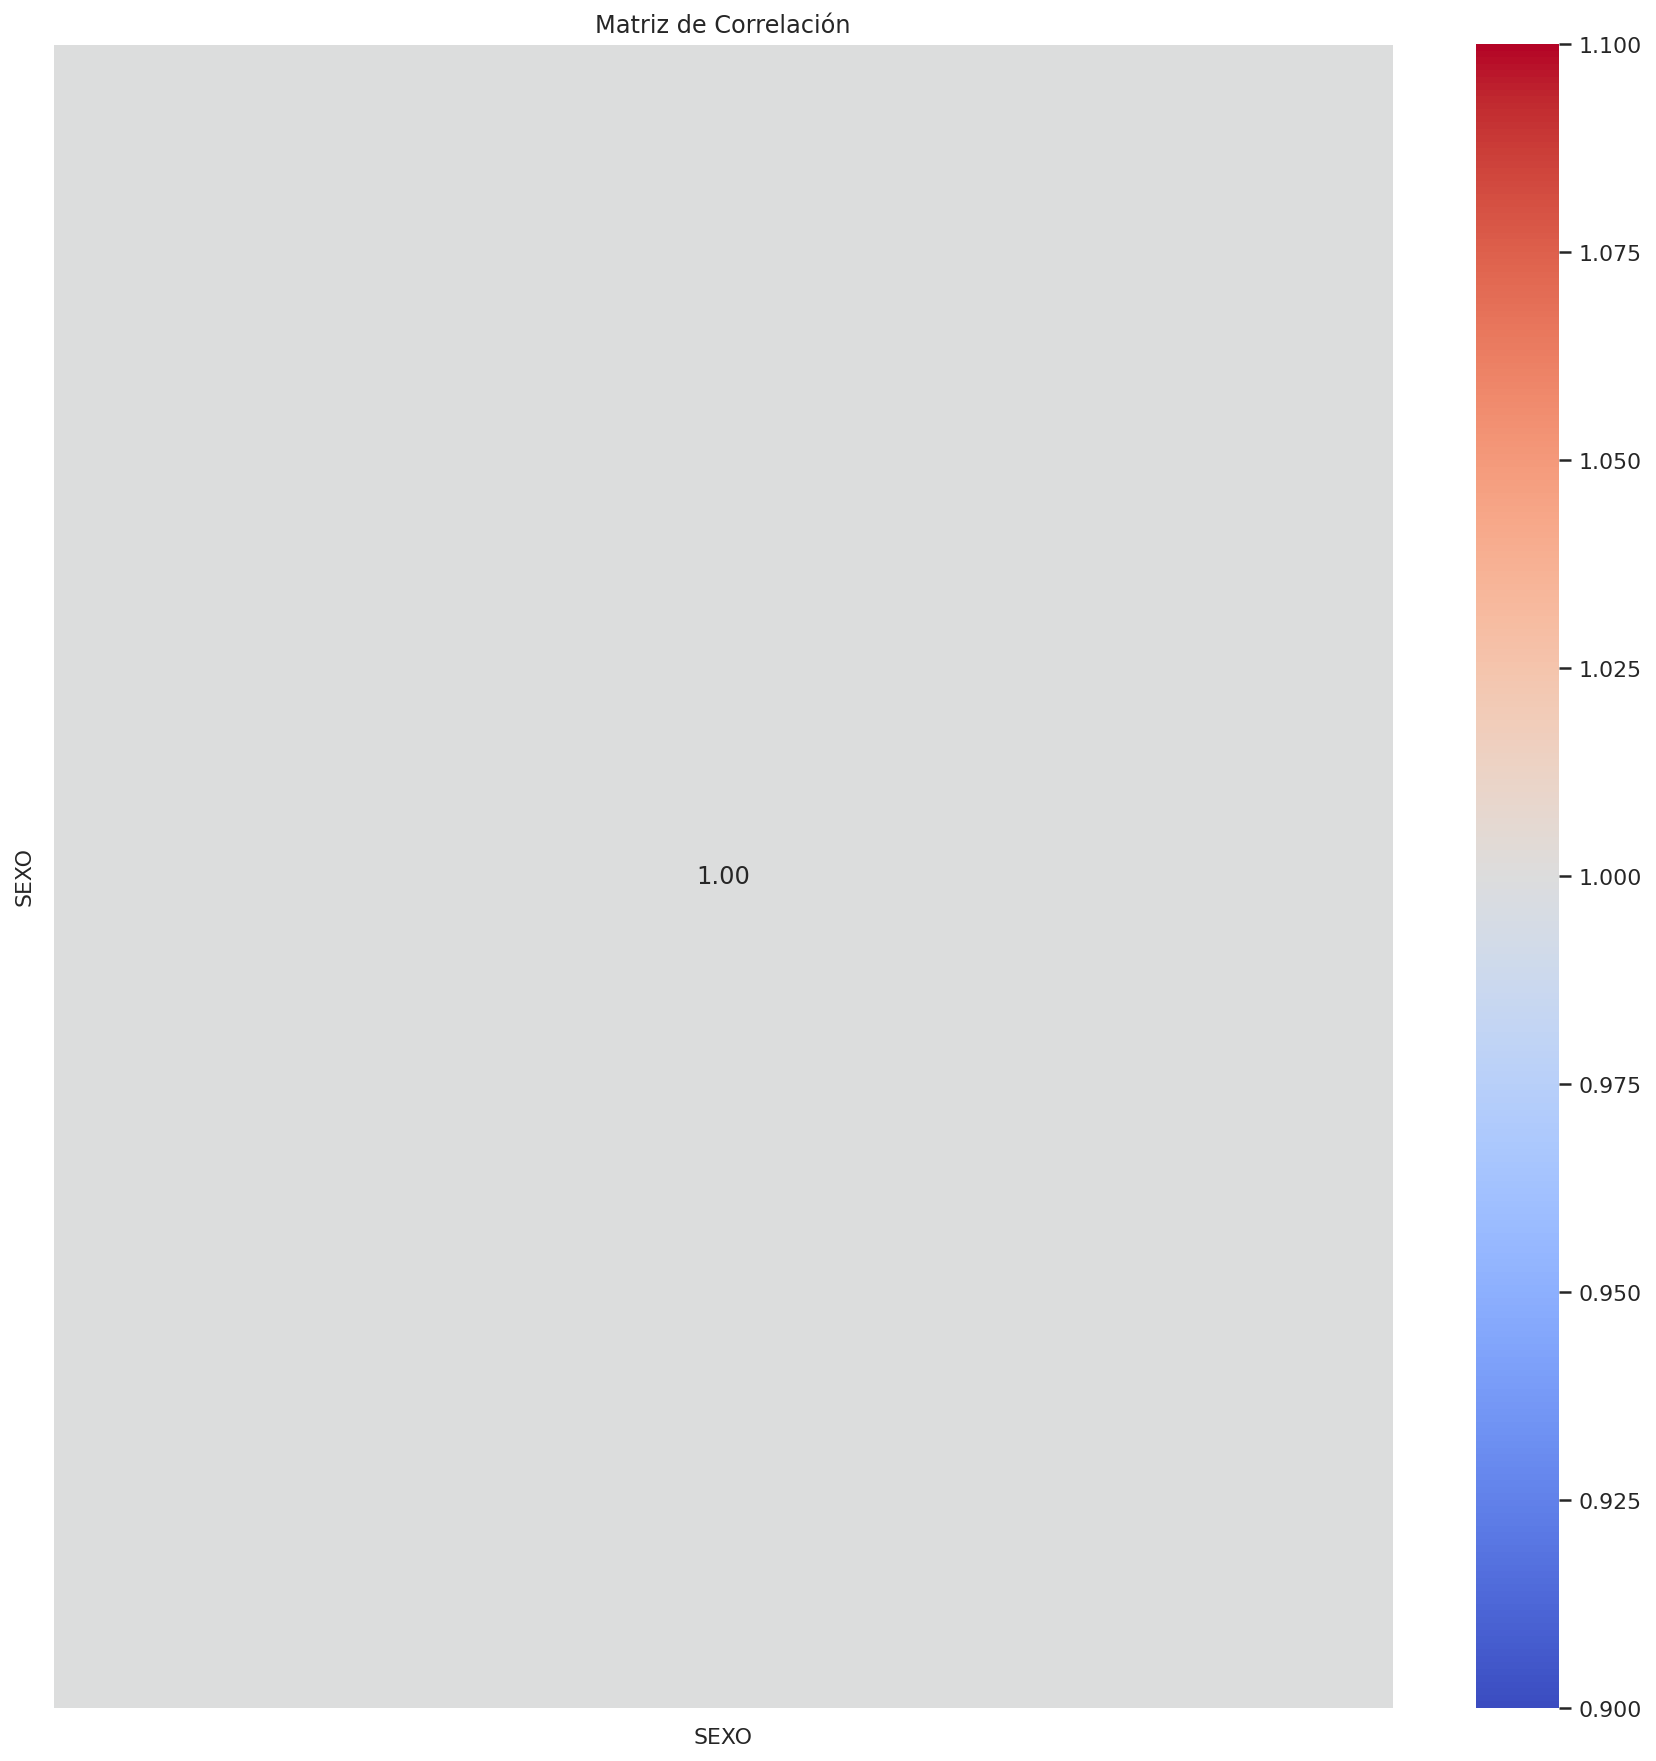

In [41]:
# Cargar los datos del archivo CSV desde el URL
url = 'https://raw.githubusercontent.com/marianarf/covid19_mexico_analysis/master/mexico_covid19.csv'
df = pd.read_csv(url)

# Seleccionar columnas iniciales
columnas_seleccionadas = ["ENTIDAD", "SEXO", "ENTIDAD_NAC", "MUNICIPIO_RES", "INTUBADO", "NEUMONIA", "EDAD",
                           "EMBARAZO", "DIABETES", "EPOC", "ASMA", "INMUSUPR", "HIPERTENSION", "OTRA_COM",
                           "CARDIOVASCULAR", "OBESIDAD", "RENAL_CRONICA", "TABAQUISMO"]

# Crear un widget de selección múltiple para las columnas
seleccion_columnas = pn.widgets.MultiSelect(name="Columnas:", options=columnas_seleccionadas, value=["ENTIDAD"])

# Crear un widget de salida para mostrar la matriz de correlación
matriz_pane = pn.pane.Matplotlib()

# Función para actualizar la matriz de correlación
def actualizar_matriz_correlacion(event):
    columnas = event.new
    df_filtrado = df[list(columnas)]
    matriz_correlacion = df_filtrado.corr()

    sns.set(style="white")

    plt.figure(figsize=(15, 15))
    sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
    plt.title("Matriz de Correlación")

    # Actualizar la salida con la nueva matriz de correlación
    matriz_pane.object = plt.gcf()

# Enlazar la función de actualización al evento de cambio en la selección de columnas
seleccion_columnas.param.watch(actualizar_matriz_correlacion, 'value')

# Crear el diseño final con el pn.Row()
layout = pn.Row(
    pn.Column(seleccion_columnas),
    pn.Row(matriz_pane)
)

# Mostrar la aplicación
layout.servable()